In [ ]:
# Import python libraries
import sqlite3 #for data
import numpy as np # for maths
import pandas as pd # for dataframe
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #for plotting

In [ ]:
health_inspections = pd.read_csv('/content/Restaurant_and_Market_Health_Inspections.csv')
housing_projects = pd.read_csv('/content/LAHD_Affordable_Housing_Projects_List__2003_to_Present_.csv')
##loading csv file into the dataframes


In [ ]:
print(health_inspections.head())
print(housing_projects.head())
# Displaying first few rows just to check how do they look

  serial_number           activity_date        facility_name  score grade  \
0     DAJ00E07B  12/29/2017 12:00:00 AM  HABITAT COFFEE SHOP     95     A   
1     DAQOKRFZB  12/29/2017 12:00:00 AM             REILLY'S     92     A   
2     DASJI4LUR  12/29/2017 12:00:00 AM       STREET CHURROS     93     A   
3     DA40LU5AT  12/29/2017 12:00:00 AM    TRINITI ECHO PARK     94     A   
4     DAXV2RMYC  12/29/2017 12:00:00 AM               POLLEN     94     A   

   service_code service_description employee_id           facility_address  \
0             1  ROUTINE INSPECTION   EE0000923     3708 N EAGLE ROCK BLVD   
1             1  ROUTINE INSPECTION   EE0000633        100 WORLD WAY # 120   
2             1  ROUTINE INSPECTION   EE0000835  6801 HOLLYWOOD BLVD # 253   
3             1  ROUTINE INSPECTION   EE0000923         1814 W SUNSET BLVD   
4             1  ROUTINE INSPECTION   EE0000923         2100 ECHO PARK AVE   

  facility_city facility_id facility_state facility_zip   owner_id  

In [ ]:
print(health_inspections.tail())
print(housing_projects.tail())

      serial_number           activity_date          facility_name  score  \
67568     DAZZ4BFUD  06/15/2018 12:00:00 AM           RAMEN MARUYA     94   
67569     DAZZ4TRBY  05/16/2018 12:00:00 AM            KANG WON DO     96   
67570     DAZZ9YUS4  04/20/2018 12:00:00 AM           OASIS MARKET     91   
67571     DAZZJBQUO  04/17/2018 12:00:00 AM       TEN TEN YU RAMEN     95   
67572     DAZZL6GP3  06/07/2018 12:00:00 AM  SUPERIOR GROCERS #113     97   

      grade  service_code service_description employee_id  \
67568     A             1  ROUTINE INSPECTION   EE0000360   
67569     A             1  ROUTINE INSPECTION   EE0000723   
67570     A             1  ROUTINE INSPECTION   EE0000594   
67571     A             1  ROUTINE INSPECTION   EE0000375   
67572     A             1  ROUTINE INSPECTION   EE0000557   

                    facility_address facility_city  ... facility_state  \
67568  104 JAPANESE VILLAGE PLZ MALL   LOS ANGELES  ...             CA   
67569         4050 W W

In [ ]:
##Not looking good

In [ ]:
print("Health Inspections Data Types:\n", health_inspections.dtypes)

print("Housing Projects Data Types:\n", housing_projects.dtypes)
# Checking data types for housing projects and health inspections

Health Inspections Data Types:
 serial_number          object
activity_date          object
facility_name          object
score                   int64
grade                  object
service_code            int64
service_description    object
employee_id            object
facility_address       object
facility_city          object
facility_id            object
facility_state         object
facility_zip           object
owner_id               object
owner_name             object
pe_description         object
program_element_pe      int64
program_name           object
program_status         object
record_id              object
dtype: object
Housing Projects Data Types:
 APN                          int64
PROJECT NUMBER              object
NAME                        object
DEVELOPMENT STAGE           object
CONSTRUCTION TYPE           object
SITE ADDRESS                object
SITE  COUNCIL DISTRICT       int64
SITE #                       int64
SITE COMMUNITY              object
SITE UNIT

In [ ]:
health_inspections['activity_date'] = pd.to_datetime(
    health_inspections['activity_date'],
    format="%m/%d/%Y %I:%M:%S %p",  # specifying the format , inspired by chatGPT
    errors='coerce'  # convert errors to NaT (Not a Time) #also inspired by ChatGPT , not copied obviously
) ## converting data types

print(health_inspections['activity_date'].head())

0   2017-12-29
1   2017-12-29
2   2017-12-29
3   2017-12-29
4   2017-12-29
Name: activity_date, dtype: datetime64[ns]


In [ ]:
# data types looks okay to me

In [ ]:

print('health inspection')
print('Number of Rows =', health_inspections.shape[0])
print('Number of Columns =', health_inspections.shape[1])

print('housing projects')
print('Number of Rows =', housing_projects.shape[0])
print('Number of Columns =', housing_projects.shape[1]) ## displaying no. of rows and columns to get clarity while seeing empty cells

health_inspections['missing_values_count'] = health_inspections.isnull().sum(axis=1)
print(health_inspections[['missing_values_count']].sort_values(by='missing_values_count', ascending=False))

housing_projects['missing_values_count'] = housing_projects.isnull().sum(axis=1)
print(housing_projects[['missing_values_count']].sort_values(by='missing_values_count', ascending=False)) #creating new column for missing values and then checking(sum) for missing values by rows



# Checking for missing values by rows


health inspection
Number of Rows = 67573
Number of Columns = 21
housing projects
Number of Rows = 595
Number of Columns = 33
       missing_values_count
40976                     1
36128                     1
34360                     1
32351                     1
35110                     1
...                     ...
22523                     0
22524                     0
22525                     0
22526                     0
67572                     0

[67573 rows x 1 columns]
     missing_values_count
8                       6
451                     4
289                     4
35                      4
175                     4
..                    ...
127                     0
333                     0
332                     0
129                     0
594                     0

[595 rows x 1 columns]


In [ ]:

print(health_inspections.isnull().sum())

print(housing_projects.isnull().sum())
##and then by columns

serial_number            0
activity_date            0
facility_name            0
score                    0
grade                    3
service_code             0
service_description      0
employee_id              0
facility_address         0
facility_city            0
facility_id              0
facility_state           0
facility_zip             0
owner_id                 0
owner_name               0
pe_description           0
program_element_pe       0
program_name            29
program_status           0
record_id                0
missing_values_count     0
dtype: int64
APN                          0
PROJECT NUMBER               0
NAME                         0
DEVELOPMENT STAGE            1
CONSTRUCTION TYPE           34
SITE ADDRESS                 0
SITE  COUNCIL DISTRICT       0
SITE #                       0
SITE COMMUNITY               7
SITE UNITS                   0
PROJECT TOTAL UNITS          0
HOUSING TYPE                22
SUPPORTIVE HOUSING           0
SH UNITS PER SITE

In [ ]:

housing_projects['JOBS'].fillna(housing_projects['JOBS'].mean(), inplace=True) #fill empty rows with mean

health_inspections_cleaned = health_inspections.dropna()
housing_projects_cleaned = housing_projects.dropna() ##clearing enpty rows

# filling JOBS and dropping other as it makes more sense , no of jobs as a location can be mean of all but can't be said for other columns

In [ ]:
print(health_inspections['facility_zip'].unique()) #to find unexpexted entries

invalid_scores = health_inspections[(health_inspections['score'] < 0) | (health_inspections['score'] > 100)] #everything is valid

print(invalid_scores)

# Checking unexpexted entries in ZIP codes as it will be usefull in future in question similiarly for score to between 1 to 100


['90065' '90045' '90028' ... '90014-2106' '90013-2345' '90015-3135']
Empty DataFrame
Columns: [serial_number, activity_date, facility_name, score, grade, service_code, service_description, employee_id, facility_address, facility_city, facility_id, facility_state, facility_zip, owner_id, owner_name, pe_description, program_element_pe, program_name, program_status, record_id, missing_values_count]
Index: []

[0 rows x 21 columns]


In [ ]:
### all okay to me

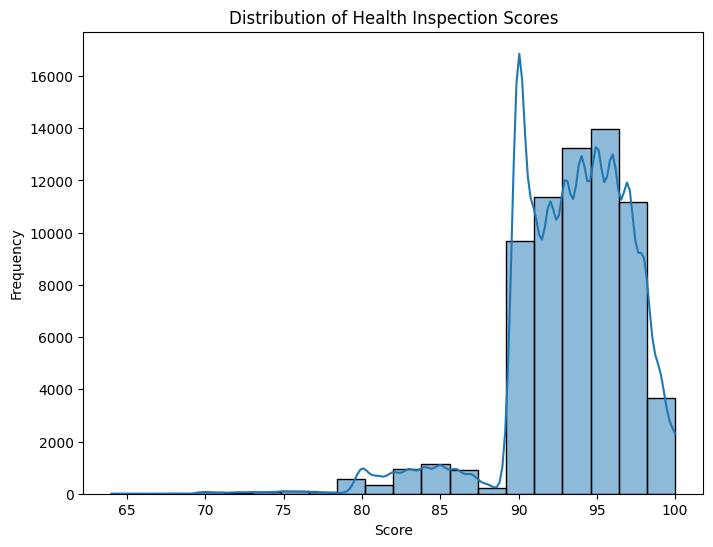

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(health_inspections['score'], bins=20, kde=True)
plt.title('Distribution of Health Inspection Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()
# checks score freq, as we can see score around 91 give most

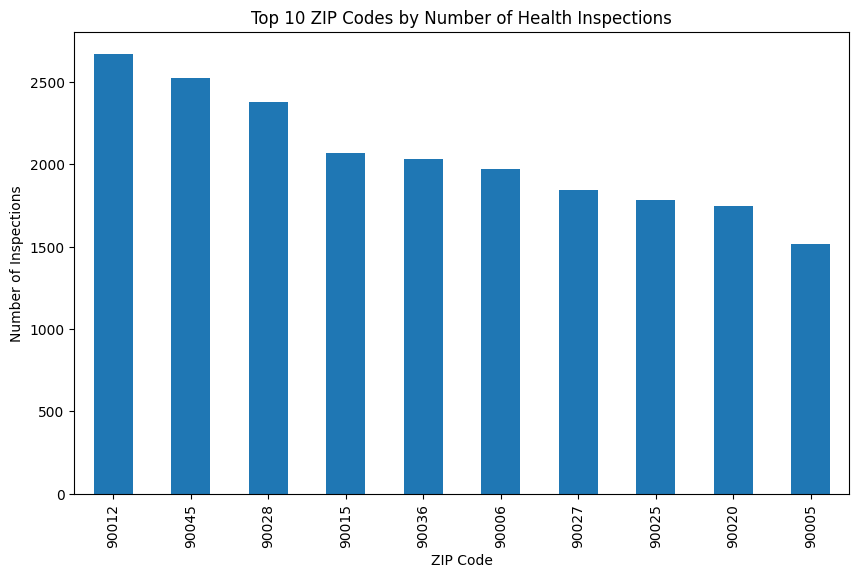

In [ ]:
plt.figure(figsize=(10,6))
health_inspections['facility_zip'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 ZIP Codes by Number of Health Inspections')
plt.xlabel('ZIP Code')
plt.ylabel('Number of Inspections')
plt.show()
## no. of health inspection in zip code

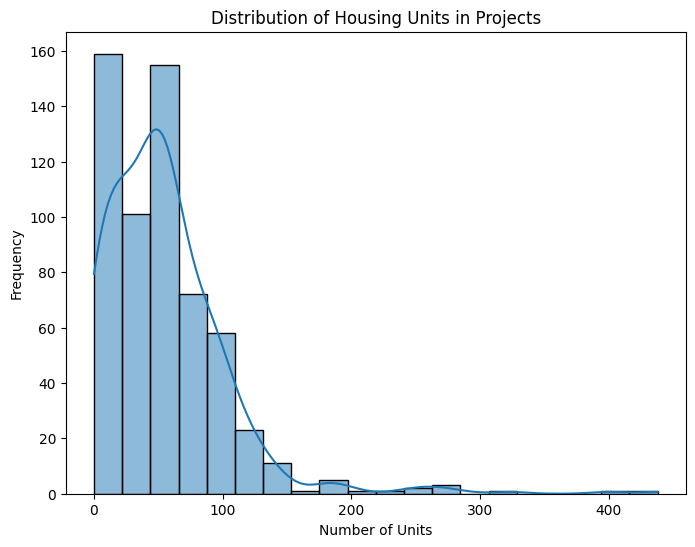

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(housing_projects['SITE UNITS'], bins=20, kde=True)
plt.title('Distribution of Housing Units in Projects')
plt.xlabel('Number of Units')
plt.ylabel('Frequency')
plt.show()
# self-explanatory title done with the help of chatgpt

In [ ]:
housing_projects['ZIP_CODE'] = housing_projects['SITE ADDRESS'].str.extract(r'(\d{5})').astype(str)
health_inspections['facility_zip'] = health_inspections['facility_zip'].astype(str).str[:5]

conn = sqlite3.connect(':memory:')

housing_projects.to_sql('housing', conn, index=False, if_exists='replace')
health_inspections.to_sql('health', conn, index=False, if_exists='replace')

housing_summary_query = """
SELECT
    ZIP_CODE,
    SUM(`SITE UNITS`) AS total_housing_units,
    SUM(`LAHD FUNDED`) AS total_funded,
    SUM(`TDC`) AS total_cost
FROM housing
GROUP BY ZIP_CODE
"""

health_summary_query = """
SELECT
    facility_zip AS ZIP_CODE,
    AVG(score) AS avg_health_score,
    COUNT(score) AS total_inspections
FROM health
GROUP BY facility_zip
"""

housing_summary = pd.read_sql(housing_summary_query, conn)
health_summary = pd.read_sql(health_summary_query, conn)

print("Housing Summary by ZIP Code:")
print(housing_summary.head())

print("\nHealth Inspections Summary by ZIP Code:")
print(health_summary.head())

# this is summary, for this I just gave chatgpt column name and it suggested what columns to summarise and also for"extract(r'(\d{5})')" may chatgpt live live for as long as human existence


Housing Summary by ZIP Code:
  ZIP_CODE  total_housing_units  total_funded  total_cost
0    10006                   16     1600000.0   7940418.0
1    10150                   34     3850000.0   3850000.0
2    10243                   55     7560000.0  31459122.0
3    10311                  123     2000000.0  33674331.0
4    10345                   43     6001178.0  37662946.0

Health Inspections Summary by ZIP Code:
  ZIP_CODE  avg_health_score  total_inspections
0    90001         93.844974               1174
1    90002         94.649057                265
2    90003         92.693412               1184
3    90004         92.866573               1424
4    90005         91.426932               1656


In [ ]:
join_query = """
SELECT
    h.ZIP_CODE,
    h.total_housing_units,
    h.total_funded,
    h.total_cost,
    i.avg_health_score,
    i.total_inspections
FROM (SELECT
        ZIP_CODE,
        SUM(`SITE UNITS`) AS total_housing_units,
        SUM(`LAHD FUNDED`) AS total_funded,
        SUM(`TDC`) AS total_cost
      FROM housing
      GROUP BY ZIP_CODE) h
JOIN (SELECT
        facility_zip AS ZIP_CODE,
        AVG(score) AS avg_health_score,
        COUNT(score) AS total_inspections
      FROM health
      GROUP BY facility_zip) i
ON h.ZIP_CODE = i.ZIP_CODE
"""

# Executing the join query and storing  result in  DataFrame
merged_data = pd.read_sql(join_query, conn)

#printing
print(merged_data.head())

merged_data.to_csv(r'/content/merged_data.csv')
#saving data to use in hypothesis

  ZIP_CODE  total_housing_units  total_funded   total_cost  avg_health_score  \
0    90002                  646    39491395.0  341671884.0         94.649057   
1    90003                  792    94213715.0  535211033.0         92.693412   
2    90004                  679    66595284.0  346710270.0         92.866573   
3    90005                  433     7501000.0  142759221.0         91.426932   
4    90006                 1084    76964153.0  524000365.0         92.740653   

   total_inspections  
0                265  
1               1184  
2               1424  
3               1656  
4               2113  


In [ ]:
from scipy import stats
# for hypothesis

In [ ]:
# Null : no relationship between the number of affordable housing units and restaurant health scores in a ZIP code.
# Alternative : There is a relationship between the number of affordable housing units and restaurant health scores in a ZIP code.

housing_units = merged_data['total_housing_units']  #creating variables
health_scores = merged_data['avg_health_score']

# Pearson correlation test (parametric test, assumes normality)
# Pearson r measures the strength and direction of the linear relationship between two variables
correlation_coefficient, p_value = stats.pearsonr(housing_units, health_scores)

#if p less than 0.05 then true or not
alpha = 0.05  # 5% significance level

# results:
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis. There is evidence of a relationship between affordable housing units and restaurant health scores.")
else:
    print("Fail to reject the null hypothesis. There is no evidence of a relationship between affordable housing units and restaurant health scores.")


Correlation Coefficient: 0.024444028246336957
P-value: 0.8675936582547689
Fail to reject the null hypothesis. There is no evidence of a relationship between affordable housing units and restaurant health scores.


pearson hypo python code inspiraton : https://youtu.be/m9r-Qck-s2g?si=QMjrmRBjOv9wka03

save merged_data.csv : https://images.app.goo.gl/ptnUecxdCqodxYQ49

SQL : 1. https://youtu.be/XE4cqdSt_vc?si=WQzbwQOchf_njgvt
      2.https://youtu.be/ZHhjqq3r9C4?si=hPLpHfHpM599wcPY


above videos were how to code in SQL but to use sql in python I took the help of Chatgpt and also to merge the databases